# Confidence Intervals

## Introduction

**Recap**: In our class about the Law of Large Numbers, we studied the sample mean $\bar{X}$ and the sample variance $S^2$. In essence, we used these two statistics as estimators of the population mean $\mu$ and the population variance $\sigma^2$, and we spent some time describing the impact of sample size on the accuracy of these estimators. 


We used this information to ask the questions: *How far from the population average would I be if I calculated the sample average right now?* and, *How big should my sample be to ensure that I am within a certain distance of the population average (when i do calculate that sample average)?*


### The Problem

How  specific is it really to tell your client that your estimates may be off by 10%? or within 1 or 2 units of whatever you are measuring? can you really plan a business around that?

### The Solution

There is a more concrete way to answer this question, which is to say: *"I am 95% confident (or 90%, or 80%) that the population mean is between this lower bound and this upper bound"*. This is called a **confidence interval**.


### Definition

- A confidence interval is a range of values that is likely to contain the true value of a parameter. In our case, we will be interested in constructing confidence intervals for the population mean $\mu$.

## Concepts to put together to understand confidence intervals

In order to construct a confidence interval, we will need to put together a few concepts that we have learned so far:

- The Normal Distribution
- Quantiles
- The CDF



### The Central Limit Theorem and the Normal Distribution

**Recap**: Continuing our recap above, remember that we refined the Law of Large numbers: Not only does the sample mean converge to the population mean, but the distribution of the sample mean is normal, with mean $\mu$ and variance $\frac{\sigma^2}{n}$.

**Recap of a recap** this is why we call the sample mean an *unbiased estimator* of the population mean. the same applies to the sample variance.

But how do we use this information to construct a confidence interval?

### The Standard Normal Distribution

To understand the next step, we have to go back to our class on distributions to consider the Standard Normal Distribution. Remember that:

- the standard normal distribution is a normal distribution with mean 0 and variance 1
- any normal distribution can be converted to a standard normal distribution.


#### The CDF and Quantiles

**Yet another Recap** Remember that the CDF of a random variable $X$ is defined as $F_X(x) = P(X \leq x)$. 

The CDF is a function that tells us the probability that $X$ is less than or equal to a certain value $x$. 

On the other hand, the quantile function is the inverse of the CDF. It tells us the value $x$ such that $P(X \leq x) = p$ for a given probability $p$.



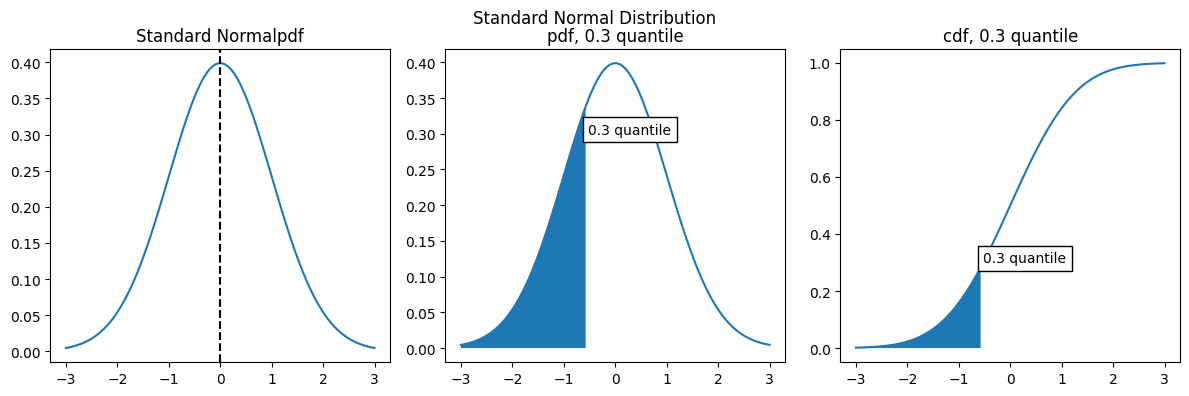

In [67]:
# plot a figure with three subplots
# on the left, a plot of the standard normal distribution using the pdf.
# in the center, a plot of the standard normal distribution, filled for the 0.3 quantile.
# on the right, a plot of the cdf of the standard normal distribution, filled for the 0.3 quantile.
# annotate the 0.3 quantile with a text box.

import numpy as np
import matplotlib.pyplot as plt
import scipy

# create a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# create a standard normal distribution
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# plot the pdf of the standard normal distribution
ax[0].plot(x, scipy.stats.norm.pdf(x, mu, sigma))
# add vertical dashed line for the mean
ax[0].axvline(mu, linestyle='dashed', color='black')

# plot the standard normal distribution, filled for the 0.3 quantile
ax[1].plot(x, scipy.stats.norm.pdf(x, mu, sigma))
ax[1].fill_between(x, 0, scipy.stats.norm.pdf(x, mu, sigma), where=x < scipy.stats.norm.ppf(0.3))

# plot the cdf of the standard normal distribution, filled for the 0.3 quantile
ax[2].plot(x, scipy.stats.norm.cdf(x, mu, sigma))
ax[2].fill_between(x, 0, scipy.stats.norm.cdf(x, mu, sigma), where=x < scipy.stats.norm.ppf(0.3))

# annotate the 0.3 quantile with a text box with a white background and black text
ax[2].text(scipy.stats.norm.ppf(0.3), 0.3, '0.3 quantile', color='black', bbox=dict(facecolor='white', edgecolor='black', ))

# do the same for the pdf plot in the center
ax[1].text(scipy.stats.norm.ppf(0.3), 0.3, '0.3 quantile', color='black', bbox=dict(facecolor='white', edgecolor='black'))


# set the title of the figure
fig.suptitle('Standard Normal Distribution')
plt.tight_layout()


# add a title to each subplot
ax[0].set_title('Standard Normalpdf')
ax[1].set_title('pdf, 0.3 quantile')
ax[2].set_title('cdf, 0.3 quantile')

# show the figure
plt.show()


### The practical 

So how, how do we use this information?

The crucial takeaway from the plot above is the relationship between the quantiles and the standard deviation. 

1. Consider the normal distribution left of the mean·
2. Consider the distance between the mean and your percentile of interest, say 0.3. 
3. Remember how previously we treated the distance to the mean using the standard deviation.

Consider the plot:

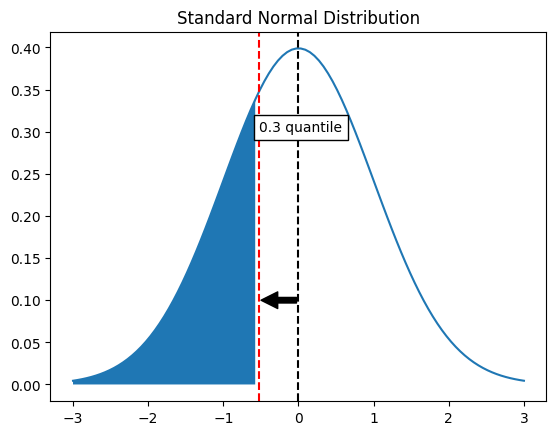

In [68]:
# plot the standard normal distribution using the pdf
# add a dashed vertical line for the mean, a red dashed vertical at the 0.3 quantile, and a text box for the 0.3 quantile
# add an arrow from the mean to the 0.3 quantile
# fill the area under the curve for the 0.3 quantile

import numpy as np
import matplotlib.pyplot as plt
import scipy

# create a standard normal distribution
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# plot the pdf of the standard normal distribution
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
# add vertical dashed line for the mean
plt.axvline(mu, linestyle='dashed', color='black')
# add vertical dashed line for the 0.3 quantile
plt.axvline(scipy.stats.norm.ppf(0.3), linestyle='dashed', color='red')

# add a text box for the 0.3 quantile
plt.text(scipy.stats.norm.ppf(0.3), 0.3, '0.3 quantile', color='black', bbox=dict(facecolor='white', edgecolor='black', ))

# add an arrow from the mean to the 0.3 quantile
plt.annotate('', xy=(scipy.stats.norm.ppf(0.3), 0.1), xytext=(mu, 0.1), arrowprops=dict(facecolor='black', shrink=0.05))

# fill the area under the curve for the 0.3 quantile
plt.fill_between(x, 0, scipy.stats.norm.pdf(x, mu, sigma), where=x <= scipy.stats.norm.ppf(0.3))

# set the title of the figure
plt.title('Standard Normal Distribution')

# increase ticks both axes
plt.tick_params(axis='both', which='major', labelsize=10)

# show the figure
plt.show()


Notice that as the distance to the mean increases, the CDF decreases.

In fact, we can plot the relationship between the CDF and the distance to the mean:

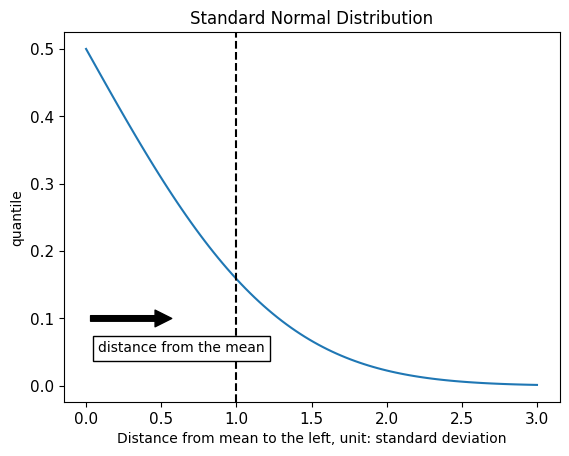

In [69]:
# plot the mean minus standard deviation against the quantile.
# use the standard deviation alone as the x-axis.

import numpy as np
import matplotlib.pyplot as plt
import scipy

# create a standard normal distribution
mu = 0
sigma = 1

# between 0 and 3 standard deviations, calculate the mean minus the standard deviation
x = np.linspace(0, 3, 100)
y = mu - x * sigma

# calculate the quantile for each value of y
y = scipy.stats.norm.cdf(y, mu, sigma)

# add an arrow goihg for the right between the mean and the 0.3 quantile
plt.annotate('', xy=(0.6, 0.1), xytext=(0, 0.1), arrowprops=dict(facecolor='black', shrink=0.05))

# add a text box saying "distance from the mean" above the arrow
plt.text(0.08, 0.05, 'distance from the mean', color='black', bbox=dict(facecolor='white', edgecolor='black', ))
# plot the quantile against the standard deviation
plt.plot(x, y)
# set the title of the figure
plt.title('Standard Normal Distribution')

# add a label to the x-axis
plt.xlabel('Distance from mean to the left, unit: standard deviation')
# add a label to the y-axis
plt.ylabel('quantile')
# increase ticks for both axes
plt.tick_params(axis='both', which='major', labelsize=11)

## add vertical line at 1 standard deviation up to the curve the quantile of -1 standard deviation
plt.axvline(1, linestyle='dashed', color='black')

# show the figure
plt.show()

In [71]:
print(f"the quantile for -1 standard deviation is {scipy.stats.norm.cdf(-1, mu, sigma)}")

the quantile for -1 standard deviation is 0.15865525393145707


### Intermediate applications

Notice that we can stipulate a quantile for 1 standard deviation, it is equal to 0.159 (rounded).

This means that 15.9% of the area under the curve is to the left of -1 standard deviation from the mean.

## Intervals

Remember our class about the CDF? We can use the CDF to calculate the probability that a random variable is within a certain range.

Take a second to visit the Notebook and play with the CDF function.

Now, in the case of the standard normal distribuition, knowing what we have just learned, we can express the probability that a random variable is within 1 standard deviation of the mean as:

$$P(-1 \leq X \leq 1) = P(X \leq 1) - P(X \leq -1) = 0.841 - 0.159 = 0.682$$

In other words, we can say that 68.2% of the area under the curve is within 1 standard deviation of the mean, or that the probability that a random variable is within 1 standard deviation of the mean is 68.2%.

### Confidence Intervals using samples

Now, we can use this information to construct a confidence interval for the population mean from a sample.

Say we sample 1000 values from a population with mean 0 and standard deviation 1. W calculate the sample mean and the sample standard deviation.

Assuming that the population is normally distributed, we can say that the probability that the sample mean is within 1 standard deviation of the population mean is 68.2%.

In other words, we can say that we are 68.2% confident that the population mean is within 1 standard deviation of the sample mean.





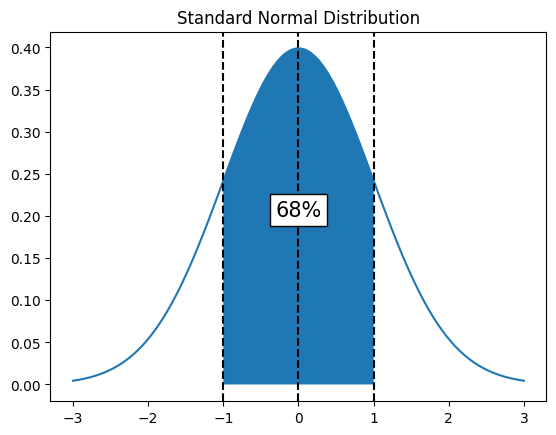

In [72]:
# plot pdf of standard normal with a vertical line at 1 standard deviation and -1 standard deviation

import numpy as np
import matplotlib.pyplot as plt
import scipy

# create a standard normal distribution
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# plot the pdf of the standard normal distribution
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
# add vertical dashed line for the mean
plt.axvline(mu, linestyle='dashed', color='black')
# add vertical dashed line for 1 standard deviation
plt.axvline(mu + sigma, linestyle='dashed', color='black')
# add vertical dashed line for -1 standard deviation
plt.axvline(mu - sigma, linestyle='dashed', color='black')

# fill the area under the curve between -1 and 1 standard deviation
plt.fill_between(x, 0, scipy.stats.norm.pdf(x, mu, sigma), where=(x <= mu + sigma) & (x >= mu - sigma))

# add text box with the text "68%" in the center, large font and white background
plt.text(mu, 0.2, '68%', color='black', bbox=dict(facecolor='white', edgecolor='black', ), horizontalalignment='center', fontsize=15)
# set the title of the figure
plt.title('Standard Normal Distribution')

# plot
plt.show()


### Dealing with "real" normal distributions

Say that this time,we sampled 1000 values from a population, but the mean is 420, and the standard deviation is 15. We assume that the population is normally distributed.

- Since the population is normally distributed, we can still say that the probability that the sample mean is within 1 standard deviation of the population mean is 68.2%.

This means that we can say that we are 68.2% confident that the population mean is between 405 and 435!


## From the Quantile to the Interval

Let's go through the steps:

1. the CDF for 1 standard deviation is 0.159.
2. it follows, the CDF for $(1 - 0.159 =) 0.841$ is 1 standard deviation to the right of the mean.
3. and the area betweeen the two is: $0.841 - 0.159 = 0.682$!

This value, 0.682, the area under the curve for that interval, is the probability that the population mean is within 1 standard deviation of the sample mean. It is our **confidence level**.


Remember that we build a relationship between the standard deviation and the quantile. What if we reverse the process, and relate the area inside the interval to the standard deviation?


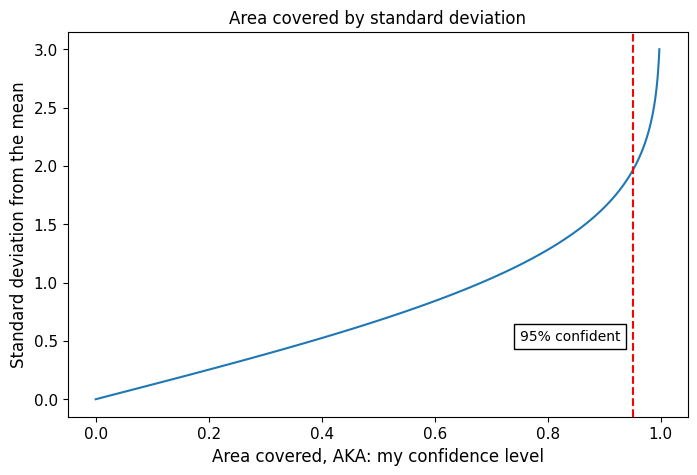

In [2]:
# plot the mean minus standard deviation against the quantile.
# use the standard deviation alone as the x-axis.

import numpy as np
import matplotlib.pyplot as plt
import scipy

# create a standard normal distribution
mu = 0
sigma = 1

# between 0 and 3 standard deviations, calculate the mean minus the standard deviation
x = np.linspace(0, 3, 100)
lower_bound = mu - x * sigma
upper_bound = mu + x * sigma

# calculate the quantile for each value of y
lower_quantile = scipy.stats.norm.cdf(lower_bound, mu, sigma)
upper_quantile = scipy.stats.norm.cdf(upper_bound, mu, sigma)
area_covered = upper_quantile - lower_quantile

# create figure with two subplots
# on the left, plot the quantile against the standard deviation
# on the right, plot the quantile against the lower bound
fig, ax = plt.subplots(figsize=(8, 5))

# plot the area covered against the standard deviation
ax.plot(area_covered, x)

# add vertical line at 0.95 quantile, dashed, red
ax.axvline(0.95, linestyle='dashed', color='red')

# add text box with text "95% quantile" at the 0.95 quantile
ax.text(0.75, 0.5, '95% confident', color='black', bbox=dict(facecolor='white', edgecolor='black', ))

# set the title of the figure
ax.set_title('Area covered by standard deviation')

# add a label to the x-axis
ax.set_xlabel('Area covered, AKA: my confidence level', fontsize=12)

# add a label to the y-axis
ax.set_ylabel('Standard deviation from the mean', fontsize=12)

# increase ticks for both axes
ax.tick_params(axis='both', which='major', labelsize=11)

# show the plot
plt.show()

### The 95% Confidence Interval

From the plot above, we can see that if we want to be very sure to capture our population mean, say, *99% sure*, we need to go far away from the mean, above 2 standard deviations.

To this end, and to standardize comparisons accross studies, it is common to use the 95% confidence interval.


### 68-95-99.7 Rule

The 68-95-99.7 rule is a rule of thumb that applies to normal distributions. It says that:

- 68% of the area under the curve is within 1 standard deviation of the mean
- 95% of the area under the curve is within 2 standard deviations of the mean
- 99.7% of the area under the curve is within 3 standard deviations of the mean

This is a very useful rule of thumb, but it is important to remember that it only applies to normal distributions.

### In python

Remember from our class on distributions that we can use the `scipy.stats.norm` module to work with the normal distribution, and that this object has a method called `ppf` that calculates the quantile for a given probability.

as such, given a confidence level `alpha`, we can calculate the quantile as:

```python
from scipy.stats import norm

alpha = 0.95
quantile = norm.ppf(alpha)
```


## Symmetry

Harken to the distribution plot where we displayed a confidence interval for 1 standard deviation (68.2% confidence interval).

Notice that because the normal distribution is symmetric, the area to the left of the mean is equal to the area to the right of the mean. It is their sum that is outside of the interval.

Remember that we used the **Quantile function** - the area to the left of your point of interest - to calculate the confidence interval. 

So, if we want a confidence interval of 95%, then the area outside of the interval is 5%, and the area to the left of the interval is 2.5%.

Hence, if we are asked to calculate the 95% confidence interval, we can calculate the quantile for 2.5% and the quantile for 97.5% and use those as our bounds. For simplicity, because the distribution is symmetric, we calculate only one quantile and use its negative as the other bound.



## Putting it all together

So, for practical, purposes, when faced with a real sample:

1. we chose our confidence level, say 95%.
2. we calculate the our adjusted quantile $z$ for that confidence level, 0.975 in our case.
3. we calculate the sample mean $\bar{X}$, sample standard deviation $\sigma$ and the standard error $ \frac{\sigma}{\sqrt{n}}$.
4. we calculate the confidence interval around the as $\bar{X} \pm z \frac{\sigma}{\sqrt{n}}$


### Example




In [1]:
import numpy as np
from scipy.stats import norm
sample = np.random.normal(420, 15, 1000)
n = len(sample)

# calculate our summary statistics
mean = np.mean(sample)
std = np.std(sample)
se_of_mean = std / np.sqrt(n)

# calculate the quantile
confidence_level = 0.95
error_margin = 1 - confidence_level # 0.05
error_margin_on_each_side = error_margin / 2 # 0.025
upper_bound_quantile = confidence_level + error_margin_on_each_side # 0.975
quantile = norm.ppf(upper_bound_quantile)

# calculate the bounds
lower_bound = mean - quantile * se_of_mean
upper_bound = mean + quantile * se_of_mean

print(f"the 95% confidence interval of the mean is {round(lower_bound,2)} to {(round(upper_bound,2))}")

the 95% confidence interval of the mean is 419.6 to 421.47



This is called the Z-Interval.

## The Z-Interval

Confidence intervals taken from the Central Limit Theorem are calculated as the sample mean, plus or minus the quantile for the desired confidence level, times the standard deviation of the sample mean, formally:

$$\bar{X} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$$

where $\alpha$ is the confidence level, and $z_{\alpha/2}$ is the adjusted quantile for the confidence level,  and $\frac{\sigma}{\sqrt{n}}$ is the standard deviation of the sample mean.

## Summary and Application 

- From the Central Limit theorem that the sample mean is a estimator of the population mean.
- From the Central Limit theorem that the sample mean is normally distributed.
- From the Standard Normal Distribution we can calculate the probability that an interval of a given size, as measured in standard deviations, captures the population mean.
- We can translate the interval we find into real units by multiplying by the standard error.



## The Elephant in the room. 

Notice that that this way of estimating a confidence interval centers our confidence interval around the sample mean. Now, we saw from the Central Limit Theorem that the sample mean converges to the population mean. But we also saw that the variance of the sample mean decreases as the sample size increases, and that it can be considerable at small sample sizes.

This means that for small sample sizes, our assumption that the sample mean is close to the true population mean can be quite wrong.

We will address this issue in the next class.
